# Modelling

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

## Load and visualize features and output variable

In [2]:
# Load the data
X = pd.read_csv('datasets/raw_data_final/features_model.csv', index_col=0).drop(columns=['ID', 'YEAR_BIRTH'], axis=1)
y = pd.read_csv('datasets/raw_data_final/output_variable_model.csv', index_col=0)

In [3]:
X.head(5)

,CLUB_NAME,CURRENT_INTERNATIONAL,AGE,MIN_PLAYING,DIST_STANDARD,DEF 3RD_TOUCHES,ATT 3RD_TOUCHES,ATT PEN_TOUCHES,ATT_TAKE,TOTDIST_CARRIES,...,MACRO_POSITION_Attack,MACRO_POSITION_Defense,MACRO_POSITION_Midfield,FOOT_both,FOOT_left,FOOT_right,PLAYER_AGENT_False,PLAYER_AGENT_True,OUTFITTER_False,OUTFITTER_True
0,52,78,0.409091,0.584089,0.215017,0.837452,0.101467,0.153846,0.082645,0.844829,...,0,1,0,0,0,1,0,1,0,1
1,52,68,0.500000,0.547529,0.262799,0.584601,0.312958,0.223776,0.041322,0.562429,...,0,1,0,0,1,0,0,1,0,1
2,52,32,0.545455,0.539631,0.361775,0.517110,0.256724,0.188811,0.082645,0.639344,...,0,1,0,0,0,1,0,1,0,1
3,52,91,0.454545,0.668617,0.447099,0.774715,0.215159,0.237762,0.099174,0.870502,...,0,1,0,0,0,1,0,1,0,1
4,52,88,0.545455,0.290143,0.412969,0.318441,0.202934,0.090909,0.033058,0.413960,...,0,1,0,0,1,0,1,0,0,1


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 2383
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CLUB_NAME                               2384 non-null   int64  
 1   CURRENT_INTERNATIONAL                   2384 non-null   int64  
 2   AGE                                     2384 non-null   float64
 3   MIN_PLAYING                             2384 non-null   float64
 4   DIST_STANDARD                           2384 non-null   float64
 5   DEF 3RD_TOUCHES                         2384 non-null   float64
 6   ATT 3RD_TOUCHES                         2384 non-null   float64
 7   ATT PEN_TOUCHES                         2384 non-null   float64
 8   ATT_TAKE                                2384 non-null   float64
 9   TOTDIST_CARRIES                         2384 non-null   float64
 10  CPA_CARRIES                             2384 non-null   floa

In [5]:
y.tail(5)

,PLAYER_VALUE
2379,15.201805
2380,14.845130
2381,13.910821
2382,13.815511
2383,13.304685


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 2383
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PLAYER_VALUE  2384 non-null   float64
dtypes: float64(1)
memory usage: 37.2 KB


## Split data into training and testing

In [7]:
# Split the data into training and testing sets using 40% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## Define evaluate model function

In [8]:
# Function to evaluate and print model performance metrics
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse:.2f}, R^2: {r2:.2f}")

## Modelling using train - test split

In [9]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

print("Linear Regression (Train Set):")
evaluate_model(y_train, y_pred_lr_train)

print("Linear Regression (Test Set):")
evaluate_model(y_test, y_pred_lr_test)

# Decision Trees
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

print("Decision Trees (Train Set):")
evaluate_model(y_train, y_pred_dt_train)

print("Decision Trees (Test Set):")
evaluate_model(y_test, y_pred_dt_test)

# Lasso Regression
lasso = Lasso(random_state=1)
lasso.fit(X_train, y_train)
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

print("Lasso Regression (Train Set):")
evaluate_model(y_train, y_pred_lasso_train)

print("Lasso Regression (Test Set):")
evaluate_model(y_test, y_pred_lasso_test)

# Decision Tree Regression
dt_regression = DecisionTreeRegressor(random_state=1)
dt_regression.fit(X_train, y_train)
y_pred_dt_regression_train = dt_regression.predict(X_train)
y_pred_dt_regression_test = dt_regression.predict(X_test)

print("Decision Tree Regression (Train Set):")
evaluate_model(y_train, y_pred_dt_regression_train)

print("Decision Tree Regression (Test Set):")
evaluate_model(y_test, y_pred_dt_regression_test)

Linear Regression (Train Set):
RMSE: 0.83, R^2: 0.66
Linear Regression (Test Set):
RMSE: 0.83, R^2: 0.64
Decision Trees (Train Set):
RMSE: 0.00, R^2: 1.00
Decision Trees (Test Set):
RMSE: 1.05, R^2: 0.42
Lasso Regression (Train Set):
RMSE: 1.42, R^2: 0.00
Lasso Regression (Test Set):
RMSE: 1.37, R^2: 0.00
Decision Tree Regression (Train Set):
RMSE: 0.00, R^2: 1.00
Decision Tree Regression (Test Set):
RMSE: 1.05, R^2: 0.42


In [10]:
coef_dict = {}
for coef, feat in zip(lr.coef_[0,:],X.columns):
    coef_dict[feat] = coef

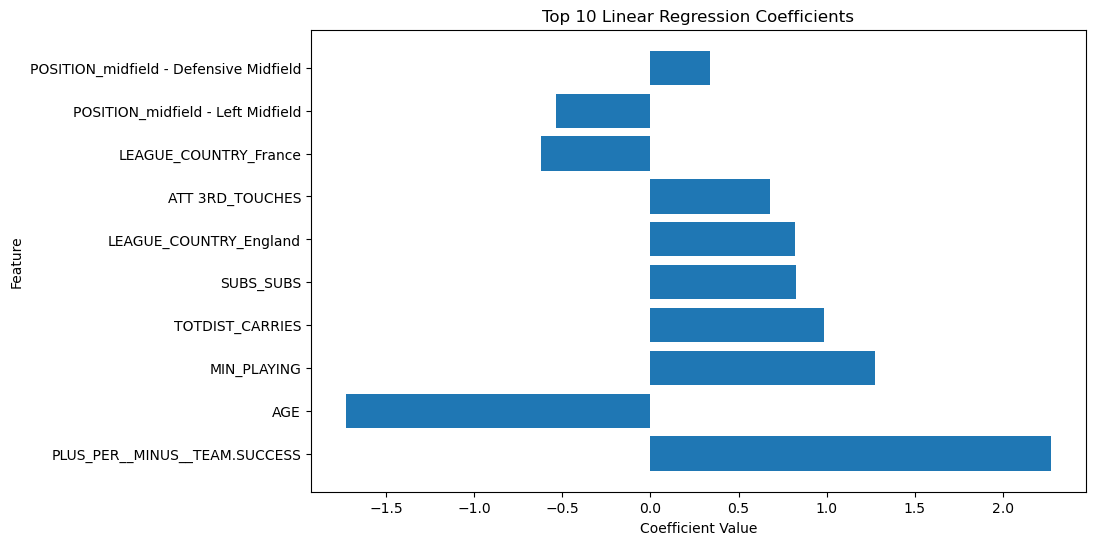

In [11]:
# Get the top 10 feature names and corresponding coefficients from coef_dict
top_features = sorted(coef_dict, key=lambda k: abs(coef_dict[k]), reverse=True)[:10]
top_coefficients = [coef_dict[feature] for feature in top_features]

# Plot the top 10 coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 10 Linear Regression Coefficients")
plt.show()


## Modelling using k-fold technique

In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

# Cross-validation using k-fold technique
kf = KFold(n_splits=5, random_state=1, shuffle=True)

# Linear Regression
lr_scores = cross_val_score(lr, X, y.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
lr_rmse_cv = np.sqrt(-lr_scores.mean())
lr_r2_cv = r2_score(y.values.ravel(), lr.predict(X))
print("Linear Regression (k-fold CV):")
print(f"RMSE: {lr_rmse_cv:.2f}, R²: {lr_r2_cv:.2f}")

# Decision Trees
dt_scores = cross_val_score(dt, X, y.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
dt_rmse_cv = np.sqrt(-dt_scores.mean())
dt_r2_cv = r2_score(y.values.ravel(), dt.predict(X))
print("Decision Trees (k-fold CV):")
print(f"RMSE: {dt_rmse_cv:.2f}, R²: {dt_r2_cv:.2f}")

# Lasso Regression
lasso_scores = cross_val_score(lasso, X, y.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
lasso_rmse_cv = np.sqrt(-lasso_scores.mean())
lasso_r2_cv = r2_score(y.values.ravel(), lasso.predict(X))
print("Lasso Regression (k-fold CV):")
print(f"RMSE: {lasso_rmse_cv:.2f}, R²: {lasso_r2_cv:.2f}")

# Decision Tree Regression
dt_regression_scores = cross_val_score(dt_regression, X, y.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
dt_regression_rmse_cv = np.sqrt(-dt_regression_scores.mean())
dt_regression_r2_cv = r2_score(y.values.ravel(), dt_regression.predict(X))
print("Decision Tree Regression (k-fold CV):")
print(f"RMSE: {dt_regression_rmse_cv:.2f}, R²: {dt_regression_r2_cv:.2f}")

Linear Regression (k-fold CV):
RMSE: 0.84, R²: 0.65
Decision Trees (k-fold CV):
RMSE: 1.04, R²: 0.78
Lasso Regression (k-fold CV):
RMSE: 1.40, R²: 0.00
Decision Tree Regression (k-fold CV):
RMSE: 1.04, R²: 0.78


### Optimizing the Decision Tree Regressor

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Step 2: Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

# Step 3: Fit and Evaluate
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Optimal Decision Tree Model:")
print(f"Best Hyperparameters: {best_params}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Step 4: Check for Overfitting
train_rmse = np.sqrt(mean_squared_error(y_train, best_dt.predict(X_train)))
train_r2 = r2_score(y_train, best_dt.predict(X_train))
print(f"Train RMSE: {train_rmse:.2f}, Train R²: {train_r2:.2f}")

Optimal Decision Tree Model:
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
RMSE: 0.91
R²: 0.56
Train RMSE: 0.79, Train R²: 0.69


In [14]:
import plotly.express as px

# Get feature importances from the best_dt model
feature_importances = best_dt.feature_importances_

# Get feature names
feature_names = X.columns

# Sort indices based on feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select top 10 most important features
top_features = [feature_names[i] for i in sorted_indices[:10]]
top_importances = feature_importances[sorted_indices][:10]

# Create a Plotly bar plot for feature importance
fig = px.bar(x=top_importances, y=top_features, orientation='h', text=top_importances,
             labels={'x': 'Feature Importance', 'y': 'Feature'},
             title='Top 10 Feature Importance of Decision Tree Model')

# Customize the layout
fig.update_layout(yaxis_autorange='reversed', xaxis_title='Feature Importance', yaxis_title='Feature',
                  showlegend=False, xaxis_tickformat=".2", xaxis_range=[0, max(top_importances) + 0.05])

# Add text labels at the end of each bar
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Show the interactive Plotly plot
fig.show()

## Optimizing the Linear Regression Model

### Bagging (Bootstrap Aggregating)

In [15]:
from sklearn.ensemble import BaggingRegressor

# Create a bagging regressor using Linear Regression as the base estimator
bagging_lr = BaggingRegressor(base_estimator=lr, n_estimators=10, random_state=1)

# Perform cross-validation and calculate RMSE
bagging_lr_scores = cross_val_score(bagging_lr, X, y.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
bagging_lr_rmse_cv = np.sqrt(-bagging_lr_scores.mean())

print("Bagging (Linear Regression) (k-fold CV):")
print(f"RMSE: {bagging_lr_rmse_cv:.2f}")

Bagging (Linear Regression) (k-fold CV):
RMSE: 0.85


### Boosting

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=1)

# Perform cross-validation and calculate RMSE
gb_scores = cross_val_score(gb_regressor, X, y.values.ravel(), cv=kf, scoring='neg_mean_squared_error')
gb_rmse_cv = np.sqrt(-gb_scores.mean())

print("Gradient Boosting (k-fold CV):")
print(f"RMSE: {gb_rmse_cv:.2f}")

Gradient Boosting (k-fold CV):
RMSE: 0.68


### Hyperparameter Optimization

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3],
    # Add other hyperparameters specific to the chosen model
}

# Create a GridSearchCV object
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=1), param_grid, cv=kf, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X, y.values.ravel())

# Print the best hyperparameters, RMSE, and R-squared
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
best_r2 = r2_score(y, y_pred)

print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)
print("Best R-squared:", best_r2)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best RMSE: 0.6527793204881664
Best R-squared: 0.9304604540636039


In [18]:
# Use the best hyperparameters from the grid search
best_params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

# Create the Gradient Boosting Regressor with the best hyperparameters
best_gb_regressor = GradientBoostingRegressor(**best_params, random_state=1)

# Train the model on the entire dataset
best_gb_regressor.fit(X, y.values.ravel())

# Get feature importances
feature_importances = best_gb_regressor.feature_importances_

# Create a list of (feature_name, importance) tuples
feature_importance_list = [(feature_name, importance) for feature_name, importance in zip(X.columns, feature_importances)]

# Sort the list by importance (descending)
feature_importance_list = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Print the top 10 most important features
print("Top 10 Most Important Features:")
for feature_name, importance in feature_importance_list[:10]:
    print(f"{feature_name}: {importance:.4f}")

Top 10 Most Important Features:
TOTDIST_CARRIES: 0.1874
AGE: 0.1426
ATT PEN_TOUCHES: 0.1323
PLUS_PER__MINUS__TEAM.SUCCESS: 0.1318
LEAGUE_COUNTRY_England: 0.0964
MIN_PLAYING: 0.0590
ATT 3RD_TOUCHES: 0.0442
CLUB_NAME: 0.0426
TOTDIST_TOTAL: 0.0317
LEAGUE_COUNTRY_France: 0.0186


In [19]:
import plotly.express as px

# Get feature importances from the best_gb_regressor model
feature_importances = best_gb_regressor.feature_importances_

# Get feature names
feature_names = X.columns

# Sort indices based on feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Select top 10 most important features
top_features = [feature_names[i] for i in sorted_indices[:10]]
top_importances = feature_importances[sorted_indices][:10]

# Create a Plotly bar plot for feature importance
fig = px.bar(x=top_importances, y=top_features, orientation='h', text=top_importances,
             labels={'x': 'Feature Importance', 'y': 'Feature'},
             title='Top 10 Feature Importance of Gradient Boosting Regressor Model')

# Customize the layout
fig.update_layout(yaxis_autorange='reversed', xaxis_title='Feature Importance', yaxis_title='Feature',
                  showlegend=False, xaxis_tickformat=".2", xaxis_range=[0, max(top_importances) + 0.05])

# Add text labels at the end of each bar
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Show the interactive Plotly plot
fig.show()

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Perform cross-validation using k-fold technique
kf = KFold(n_splits=5, random_state=1, shuffle=True)

# Calculate R-squared and RMSE for the entire dataset
r2_scores = cross_val_score(best_gb_regressor, X, y.values.ravel(), cv=kf, scoring='r2')
average_r2 = r2_scores.mean()

rmse_scores = np.sqrt(-cross_val_score(best_gb_regressor, X, y.values.ravel(), cv=kf, scoring='neg_mean_squared_error'))
average_rmse = rmse_scores.mean()

print("Average R-squared on Validation Sets:", average_r2)
print("Average RMSE on Validation Sets:", average_rmse)

# Calculate R-squared and RMSE for the training set
best_gb_regressor.fit(X, y.values.ravel())
y_pred_train = best_gb_regressor.predict(X)
r2_train = r2_score(y, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y, y_pred_train))

print("R-squared on Training Set:", r2_train)
print("RMSE on Training Set:", rmse_train)

# Compare R-squared and RMSE values to detect overfitting
if r2_train > average_r2 and rmse_train < average_rmse:
    print("The model may be overfitting but has lower RMSE.")
else:
    print("The model appears to be performing reasonably.")

Average R-squared on Validation Sets: 0.782943751767603
Average RMSE on Validation Sets: 0.6525208911742464
R-squared on Training Set: 0.9304604540636039
RMSE on Training Set: 0.3700564665303097
The model may be overfitting but has lower RMSE.


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your features X and output variable y

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Creating a Ridge Regressor
ridge = Ridge()

# Fitting the model on the training data
ridge.fit(X_train, y_train)

# Predicting on the training data
y_train_pred = ridge.predict(X_train)

# Predicting on the test data
y_test_pred = ridge.predict(X_test)

# Calculating RMSE and R2 for the training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Calculating RMSE and R2 for the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {rmse_train:.2f}")
print(f"Training R2: {r2_train:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R2: {r2_test:.2f}")

Training RMSE: 0.83
Training R2: 0.66
Test RMSE: 0.83
Test R2: 0.64


In [22]:
coef_dict_ridge = {}
for coef, feat in zip(ridge.coef_[0,:],X.columns):
    coef_dict_ridge[feat] = coef

In [28]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# Sort the coefficients in descending order
sorted_coef_dict = dict(sorted(coef_dict_ridge.items(), key=lambda item: abs(item[1]), reverse=True))

# Select only the top 10 coefficients
top_coef_dict = {k: v for k, v in sorted_coef_dict.items() if k in list(sorted_coef_dict.keys())[:10]}

# Create a DataFrame for Plotly Express
coef_df = pd.DataFrame.from_dict(top_coef_dict, orient='index', columns=['Coefficient'])

# Create a bar plot using Plotly Express
fig = px.bar(coef_df, y=coef_df.index, x='Coefficient', orientation='h', title='Top 10 Ridge Regressor Coefficients (Descending Order)')
fig.update_layout(yaxis_autorange='reversed')  # Invert the y-axis
fig.show()

## Modelling based on the player's position

In [ ]:
# Separate the data based on 'MACRO_POSITION' columns
attack_indices = X['MACRO_POSITION_Attack'] == 1
defense_indices = X['MACRO_POSITION_Defense'] == 1
midfield_indices = X['MACRO_POSITION_Midfield'] == 1

### Gradient Boosting

In [ ]:
import joblib
import statsmodels.api as sm

# Initialize lists to store RMSE values for each model
rmse_attack = []
rmse_defense = []
rmse_midfield = []

# Initialize lists to store R-squared values for each model
r2_attack = []
r2_defense = []
r2_midfield = []

# Initialize lists to store feature importances for each model
feature_importance_attack = []
feature_importance_defense = []
feature_importance_midfield = []

# Perform hyperparameter optimization and train models for each subset
for indices, position in zip([attack_indices, defense_indices, midfield_indices], ['Attack', 'Defense', 'Midfield']):
    X_subset = X[indices]
    y_subset = y[indices]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.4, random_state=1)

    # Create a Gradient Boosting Regressor
    gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=1)

    # Fit the model
    gb_regressor.fit(X_train, y_train.values.ravel())

    # Predict on the test set
    y_pred = gb_regressor.predict(X_test)

    # Calculate R-squared for the current subset
    r2 = r2_score(y_test, y_pred)

    if position == 'Attack':
        r2_attack.append(r2)
        feature_importance_attack.append(gb_regressor.feature_importances_)
    elif position == 'Defense':
        r2_defense.append(r2)
        feature_importance_defense.append(gb_regressor.feature_importances_)
    elif position == 'Midfield':
        r2_midfield.append(r2)
        feature_importance_midfield.append(gb_regressor.feature_importances_)
    
    # Calculate RMSE for the current subset
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    if position == 'Attack':
        rmse_attack.append(rmse)
    elif position == 'Defense':
        rmse_defense.append(rmse)
    elif position == 'Midfield':
        rmse_midfield.append(rmse)
        
    # Save the model
    model_filename = f'models/model_{position}.joblib'
    joblib.dump(gb_regressor, model_filename)

In [ ]:
import matplotlib.pyplot as plt

# Show the top 5 most important features for each model
def plot_feature_importance(position, feature_importance):
    top_features = X.columns[np.argsort(feature_importance)[::-1]][:10]
    top_importance = feature_importance[np.argsort(feature_importance)[::-1]][:10]

    plt.figure(figsize=(10, 8))
    plt.barh(top_features, top_importance, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title(f'Top 10 Most Important Features for {position} players')
    plt.gca().invert_yaxis()

    for i, (feature, importance) in enumerate(zip(top_features, top_importance)):
        plt.text(importance + 0.005, i, f'{importance:.4f}', va='center', color='black', fontsize=10)

    plt.show()

plot_feature_importance('Attack', np.mean(feature_importance_attack, axis=0))
plot_feature_importance('Defense', np.mean(feature_importance_defense, axis=0))
plot_feature_importance('Midfield', np.mean(feature_importance_midfield, axis=0))

#### Overfitting Analysis

In [ ]:
from sklearn.metrics import mean_squared_error

# Initialize lists to store RMSE values for each model
rmse_attack_train = []
rmse_attack_test = []

rmse_defense_train = []
rmse_defense_test = []

rmse_midfield_train = []
rmse_midfield_test = []

# Perform hyperparameter optimization and train models for each subset
for indices, position in zip([attack_indices, defense_indices, midfield_indices], ['Attack', 'Defense', 'Midfield']):
    X_subset = X[indices]
    y_subset = y[indices]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.4, random_state=1)

    # Create a Gradient Boosting Regressor
    gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=1)

    # Fit the model
    gb_regressor.fit(X_train, y_train.values.ravel())

    # Predict on training data
    y_train_pred = gb_regressor.predict(X_train)

    # Predict on test data
    y_test_pred = gb_regressor.predict(X_test)

    # Calculate RMSE for training and test data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    if position == 'Attack':
        rmse_attack_train.append(rmse_train)
        rmse_attack_test.append(rmse_test)
    elif position == 'Defense':
        rmse_defense_train.append(rmse_train)
        rmse_defense_test.append(rmse_test)
    elif position == 'Midfield':
        rmse_midfield_train.append(rmse_train)
        rmse_midfield_test.append(rmse_test)

# Print RMSE values for each model
print("Overfitting Analysis - Attack:")
print(f"  RMSE (Train): {np.mean(rmse_attack_train):.4f}")
print(f"  RMSE (Test): {np.mean(rmse_attack_test):.4f}")
print()

print("Overfitting Analysis - Defense:")
print(f"  RMSE (Train): {np.mean(rmse_defense_train):.4f}")
print(f"  RMSE (Test): {np.mean(rmse_defense_test):.4f}")
print()

print("Overfitting Analysis - Midfield:")
print(f"  RMSE (Train): {np.mean(rmse_midfield_train):.4f}")
print(f"  RMSE (Test): {np.mean(rmse_midfield_test):.4f}")

### Ridge Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

# Initialize lists to store RMSE values for each model
rmse_attack_train = []
rmse_attack_test = []
r2_attack_scores = []
best_params_attack = []

rmse_defense_train = []
rmse_defense_test = []
r2_defense_scores = []
best_params_defense = []

rmse_midfield_train = []
rmse_midfield_test = []
r2_midfield_scores = []
best_params_midfield = []

# Initialize lists to store feature importances for each model
feature_importance_attack = []
feature_importance_defense = []
feature_importance_midfield = []

# Parameters for grid search
param_grid = {'alpha': [0.01, 0.1, 1, 10]}

# Perform hyperparameter optimization and train models for each subset
for indices, position in zip([attack_indices, defense_indices, midfield_indices], ['Attack', 'Defense', 'Midfield']):
    X_subset = X[indices]
    y_subset = y[indices]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.4, random_state=1)

    # Create Ridge regressor
    ridge = Ridge()

    # Perform GridSearchCV
    grid_search = GridSearchCV(ridge, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get best parameters and best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Predict on training data
    y_train_pred = best_estimator.predict(X_train)

    # Predict on test data
    y_test_pred = best_estimator.predict(X_test)

    # Calculate RMSE for training and test data
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Calculate R-squared score for test data
    r2_score_test = r2_score(y_test, y_test_pred)

    if position == 'Attack':
        rmse_attack_train.append(rmse_train)
        rmse_attack_test.append(rmse_test)
        r2_attack_scores.append(r2_score_test)
        feature_importance_attack = best_estimator.coef_
        best_params_attack.append(best_params)
    elif position == 'Defense':
        rmse_defense_train.append(rmse_train)
        rmse_defense_test.append(rmse_test)
        r2_defense_scores.append(r2_score_test)
        feature_importance_defense = best_estimator.coef_
        best_params_defense.append(best_params)
    elif position == 'Midfield':
        rmse_midfield_train.append(rmse_train)
        rmse_midfield_test.append(rmse_test)
        r2_midfield_scores.append(r2_score_test)
        feature_importance_midfield = best_estimator.coef_
        best_params_midfield.append(best_params)

# Print overfitting analysis and R-squared scores for each model
print("Overfitting Analysis with Regularization - Attack:")
print(f"  RMSE (Train): {np.mean(rmse_attack_train):.4f}")
print(f"  RMSE (Test): {np.mean(rmse_attack_test):.4f}")
print(f"  R-squared (Test): {np.mean(r2_attack_scores):.4f}")
print(f"  Best Parameters: {best_params_attack}")

print("\nOverfitting Analysis with Regularization - Defense:")
print(f"  RMSE (Train): {np.mean(rmse_defense_train):.4f}")
print(f"  RMSE (Test): {np.mean(rmse_defense_test):.4f}")
print(f"  R-squared (Test): {np.mean(r2_defense_scores):.4f}")
print(f"  Best Parameters: {best_params_defense}")

print("\nOverfitting Analysis with Regularization - Midfield:")
print(f"  RMSE (Train): {np.mean(rmse_midfield_train):.4f}")
print(f"  RMSE (Test): {np.mean(rmse_midfield_test):.4f}")
print(f"  R-squared (Test): {np.mean(r2_midfield_scores):.4f}")
print(f"  Best Parameters: {best_params_midfield}")